In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 100MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 43.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 22.5MB/s]


In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
data.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрела что по nan-ам, информация по данным

In [ ]:
# YOUR CODE
data.isna().sum()
# data.info()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

столбец "TotalSpent" был в типе object, перевела в float, как и подразумевалось

In [ ]:
data["TotalSpent"] = pd.to_numeric(data["TotalSpent"], errors='coerce').astype(float)

Делим выборку на target и обучающие фичи

In [ ]:
X = data.drop(target_col, axis=1)
y = data[target_col]

Смотрю, что по выбросам и по масштабу данных. Обнаруживаю, что столбец Total Spent на несколько порядков больше. Поэтому надо нормализовать. Файл сохранился с прогоном после нормализации, поэтому графики нормальные

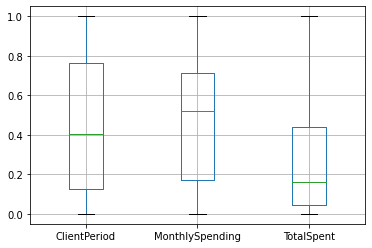

In [ ]:
# YOUR CODE
import matplotlib.pyplot as plt

X.boxplot(column=num_cols)

plt.show()


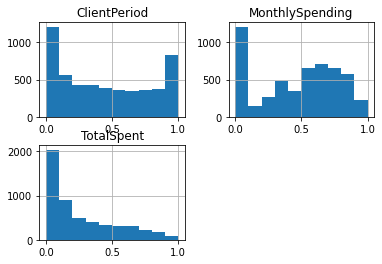

In [ ]:
# YOUR CODE
X[num_cols].hist()

plt.show()

Первый способ нормализации: (сработал плохо, слишком сильно уменьшает порядок, все равно не сбалансированы порядки)

In [ ]:
X['TotalSpent'] = X['TotalSpent'].apply(lambda x: (x - X['TotalSpent'].mean()) / X['TotalSpent'].std())

тут посмотрели сбалансированность

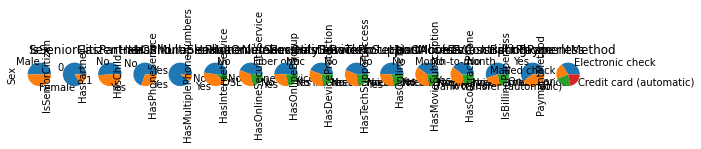

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(10,5))
for i, col in enumerate(cat_cols):
  value_counts = X[col].value_counts()
  value_counts.plot.pie(ax=axs[i], rot=0)
  axs[i].set_title(col)
plt.show()

а тут сбалансированность тагретовой переменной

In [ ]:
y.value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Тут нормализация с библиотекой, поэтому это уже "по-нормальному", а также onehotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
encoder = OneHotEncoder()
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X_encoded = pd.DataFrame(encoder.fit_transform(X[cat_cols]).toarray(),
                         columns=encoder.get_feature_names_out(cat_cols))

# Объединить закодированные признаки с числовыми
X = pd.concat([X.drop(cat_cols, axis=1), X_encoded], axis=1)

После манипуляций, образовались nan-ы, долой их

In [ ]:
X = X.dropna()
y = y[X.index]

In [ ]:
X.isna().sum()

ClientPeriod                                    0
MonthlySpending                                 0
TotalSpent                                      0
Sex_Female                                      0
Sex_Male                                        0
IsSeniorCitizen_0                               0
IsSeniorCitizen_1                               0
HasPartner_No                                   0
HasPartner_Yes                                  0
HasChild_No                                     0
HasChild_Yes                                    0
HasPhoneService_No                              0
HasPhoneService_Yes                             0
HasMultiplePhoneNumbers_No                      0
HasMultiplePhoneNumbers_No phone service        0
HasMultiplePhoneNumbers_Yes                     0
HasInternetService_DSL                          0
HasInternetService_Fiber optic                  0
HasInternetService_No                           0
HasOnlineSecurityService_No                     0


было принято стратегическое решение выбрать вариант легче и сравнить метрику "тупо в лоб", выбрали лучший вариант, обучили лог регрессию


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Разделить данные на train/valid выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Создать список значений гиперпараметра C
C_values = [100, 10, 1, 0.1, 0.01, 0.001]

# Протестировать разные значения C
best_C = None
best_score = 0

for C in C_values:
    # Создать и обучить модель
    clf = LogisticRegression(C=C, max_iter=1000)
    clf.fit(X_train, y_train)

    # Получить предсказания для валидационной выборки
    y_pred = clf.predict_proba(X_valid)[:, 1]

    # Вычислить метрику ROC-AUC
    score = roc_auc_score(y_valid, y_pred)

    # Сохранить лучшее значение гиперпараметра и метрику
    if score > best_score:
        best_score = score
        best_C = C

# Обучить модель на всех данных с лучшим параметром C
clf = LogisticRegression(C=best_C, max_iter=1000)
clf.fit(X, y)


LogisticRegression(C=10, max_iter=1000)

In [ ]:
best_score

0.844265156876622

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.1 MB/s eta 0:00:00


тут catboost, (прирост не существенный, но есть)

In [ ]:
# YOUR CODE
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier


# Отделить признаки от целевой переменной
X = data.drop(target_col, axis=1)
y = data[target_col]

# Разделить данные на train/valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Создать экземпляр класса CatBoostClassifier
clf = CatBoostClassifier(cat_features=cat_cols)

# Задать значения параметров для поиска лучших комбинаций
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Использовать GridSearchCV для поиска лучших комбинаций параметров
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train, cat_features=cat_cols)

# Вывести лучшие параметры и метрики качества на валидационной выборке
print('Best parameters:', grid_search.best_params_)
print('Best ROC-AUC score:', grid_search.best_score_)
print('Validation ROC-AUC score:', grid_search.best_estimator_.score(X_valid, y_valid))


0:	learn: 0.6568616	total: 52.9ms	remaining: 5.24s
1:	learn: 0.6257554	total: 56.7ms	remaining: 2.78s
2:	learn: 0.5988467	total: 59.8ms	remaining: 1.93s
3:	learn: 0.5763852	total: 63ms	remaining: 1.51s
4:	learn: 0.5588328	total: 66.1ms	remaining: 1.26s
5:	learn: 0.5427589	total: 69.9ms	remaining: 1.09s
6:	learn: 0.5276966	total: 73.1ms	remaining: 971ms
7:	learn: 0.5152492	total: 76.3ms	remaining: 877ms
8:	learn: 0.5045771	total: 79.7ms	remaining: 806ms
9:	learn: 0.4950294	total: 83ms	remaining: 747ms
10:	learn: 0.4858723	total: 84.8ms	remaining: 686ms
11:	learn: 0.4774517	total: 86.5ms	remaining: 634ms
12:	learn: 0.4707478	total: 87.8ms	remaining: 588ms
13:	learn: 0.4641716	total: 91.9ms	remaining: 565ms
14:	learn: 0.4590523	total: 93.9ms	remaining: 532ms
15:	learn: 0.4528122	total: 97.5ms	remaining: 512ms
16:	learn: 0.4471808	total: 101ms	remaining: 492ms
17:	learn: 0.4424357	total: 103ms	remaining: 471ms
18:	learn: 0.4383912	total: 107ms	remaining: 456ms
19:	learn: 0.4344450	total: 1

обучаем

In [ ]:
clf2 = CatBoostClassifier(cat_features=cat_cols, learning_rate=0.1, n_estimators=100)
clf2.fit(X_train, y_train)

0:	learn: 0.6568616	total: 4.22ms	remaining: 417ms
1:	learn: 0.6257554	total: 8.46ms	remaining: 415ms
2:	learn: 0.5988467	total: 11.8ms	remaining: 381ms
3:	learn: 0.5763852	total: 15.2ms	remaining: 364ms
4:	learn: 0.5588328	total: 18.6ms	remaining: 353ms
5:	learn: 0.5427589	total: 24.1ms	remaining: 377ms
6:	learn: 0.5276966	total: 27.9ms	remaining: 370ms
7:	learn: 0.5152492	total: 32.5ms	remaining: 374ms
8:	learn: 0.5045771	total: 36.6ms	remaining: 371ms
9:	learn: 0.4950294	total: 42.1ms	remaining: 379ms
10:	learn: 0.4858723	total: 45.2ms	remaining: 366ms
11:	learn: 0.4774517	total: 48.5ms	remaining: 356ms
12:	learn: 0.4707478	total: 50.5ms	remaining: 338ms
13:	learn: 0.4641716	total: 54ms	remaining: 332ms
14:	learn: 0.4590523	total: 55.8ms	remaining: 316ms
15:	learn: 0.4528122	total: 59.4ms	remaining: 312ms
16:	learn: 0.4471808	total: 62.6ms	remaining: 306ms
17:	learn: 0.4424357	total: 65.1ms	remaining: 297ms
18:	learn: 0.4383912	total: 68.3ms	remaining: 291ms
19:	learn: 0.4344450	tot

# Предсказания

In [ ]:
best_model = clf# какая-то предыдущая модель

In [ ]:
best_model.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,best_model.predict(X_test)]
submission.to_csv('./my_submission.csv', index=False)

ValueError: ignored

Лучшее решение отправьте в Stepik.